# Importing the libraries

In [19]:
import tensorflow as tf
from tensorflow.keras import layers, utils
from tensorflow import keras
from matplotlib import pyplot as plt

import sys
sys.path.insert(0, '../../')
from plot_graphs import plot_loss, plot_acc

# Setting Image and Batch Size

In [7]:
IMAGE_SIZE = 100
BATCH_SIZE = 32

# Loading the train, val, and test data

In [8]:
train = utils.image_dataset_from_directory("../../datasets/data/split/Zenodo/train", image_size=(IMAGE_SIZE, IMAGE_SIZE), batch_size=BATCH_SIZE)
val = utils.image_dataset_from_directory("../../datasets/data/split/Zenodo/val", image_size=(IMAGE_SIZE, IMAGE_SIZE), batch_size=BATCH_SIZE)
test = utils.image_dataset_from_directory("../../datasets/data/split/Zenodo/test", image_size=(IMAGE_SIZE, IMAGE_SIZE), batch_size=BATCH_SIZE)

Found 3360 files belonging to 6 classes.
Found 720 files belonging to 6 classes.
Found 720 files belonging to 6 classes.


# Adding augmentation layer

In [10]:
# Using this method for M1 Mac CPU acces to run augmentation
with tf.device('/cpu:0'):
  data_augmentation = keras.Sequential(
  [
      layers.RandomFlip("horizontal"),
      layers.RandomRotation(0.1),
      layers.RandomZoom(0.2)
      # layers.RandomContrast(0.2),
      # layers.RandomTranslation(height_factor=0.2,width_factor=0.3)
  ] 
  )

# Defining the model

In [11]:
inputs = keras.Input(shape=(100, 100, 3))
x = inputs
with tf.device('/cpu:0'):
  x = data_augmentation(x)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(128, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(256, 3, activation='relu')(x)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(6, activation='softmax')(x)

model = keras.Model(inputs, outputs)

model.compile(optimizer=keras.optimizers.RMSprop(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 100, 100, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 100, 100, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                             

# Adding Callbacks

In [12]:
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath="../../models/zenodo/m4_Augmentation.h5",
        monitor="val_accuracy",
        save_best_only=True
    )
]

# Running the model

In [13]:
history = model.fit(
  train.cache(),
  epochs=40,
  callbacks=callbacks_list,
  validation_data=val.cache()
)

Epoch 1/40


2022-08-04 09:32:36.492479: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-08-04 09:32:36.492595: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


105/105 [==============================] - ETA: 0s - loss: 1.7751 - accuracy: 0.2089

2022-08-04 09:32:42.949690: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


105/105 [==============================] - 7s 61ms/step - loss: 1.7751 - accuracy: 0.2089 - val_loss: 1.7581 - val_accuracy: 0.3097
Epoch 2/40
105/105 [==============================] - 6s 57ms/step - loss: 1.6339 - accuracy: 0.3372 - val_loss: 1.6626 - val_accuracy: 0.2611
Epoch 3/40
105/105 [==============================] - 6s 57ms/step - loss: 1.5217 - accuracy: 0.3926 - val_loss: 1.8065 - val_accuracy: 0.2694
Epoch 4/40
105/105 [==============================] - 6s 57ms/step - loss: 1.4314 - accuracy: 0.4342 - val_loss: 1.4955 - val_accuracy: 0.3806
Epoch 5/40
105/105 [==============================] - 6s 58ms/step - loss: 1.3344 - accuracy: 0.4842 - val_loss: 1.1496 - val_accuracy: 0.4847
Epoch 6/40
105/105 [==============================] - 6s 57ms/step - loss: 1.2329 - accuracy: 0.5286 - val_loss: 1.6582 - val_accuracy: 0.3903
Epoch 7/40
105/105 [==============================] - 6s 57ms/step - loss: 1.1428 - accuracy: 0.5696 - val_loss: 1.3640 - val_accuracy: 0.4500
Epoch 8/40

# Evaluating the model

In [14]:

model.evaluate(test)

load_model = keras.models.load_model("../../models/zenodo/m4_Augmentation.h5")
load_model.evaluate(test)

 8/23 [=========>....................] - ETA: 0s - loss: 0.4328 - accuracy: 0.8516

2022-08-04 09:36:44.820794: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


23/23 [==============================] - 1s 17ms/step - loss: 0.3958 - accuracy: 0.8653


[0.39580008387565613, 0.8652778267860413]

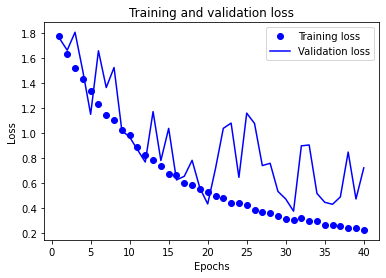

In [20]:
plot_loss(history)

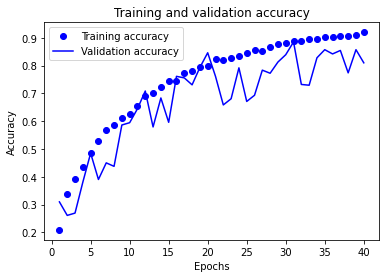

In [21]:
plot_acc(history)